---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Plotting

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


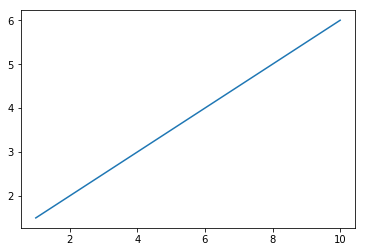

In [2]:
x = np.linspace(1,10,10)
plt.plot(x, x/2.+1.)

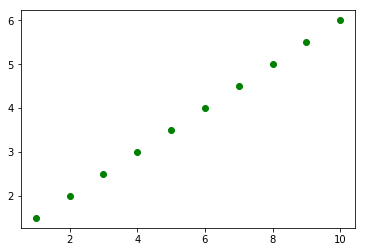

In [3]:
plt.plot(x, x/2.+1., 'go') #'go' == green circles 


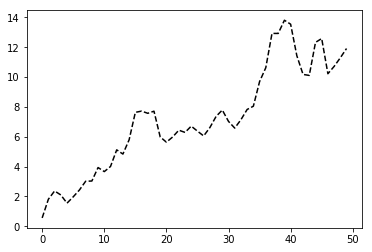

In [4]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--') #cumsum() == cumulative sum ; k-- trattini neri 

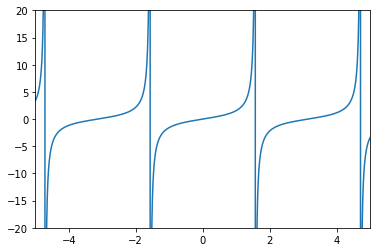

In [5]:
x = arange(-5, 5, 0.001)
y= np.tan(x)
plt.ylim((-20, 20))
plt.xlim(-5,5)
tanplot = plot(x,y)

### Multiple plots and Labels

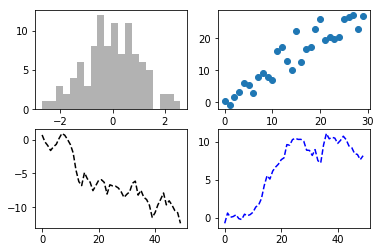

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1) ## # colonne, # righe, e ordine
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
ax3.plot(randn(50).cumsum(), 'k--')
ax4.plot(randn(50).cumsum(), 'b--')

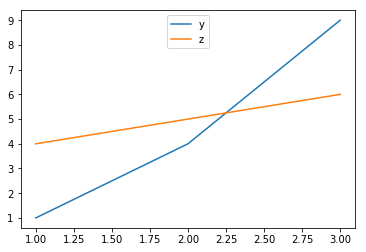

In [7]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [4, 5, 6]
plot(x, y, label='y')
plot(x, z, label='z')
plt.legend(loc='upper center')

Text(0.5,1,'Plot of the cosine function.')

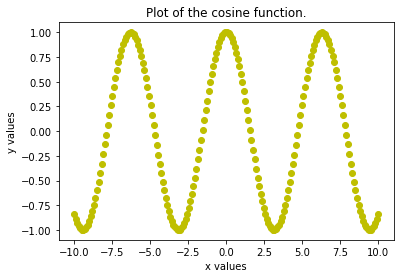

In [8]:
x = np.linspace(-10, 10, 200)
y = np.cos(x)
plt.plot(x, y, 'yo')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of the cosine function.')

## Histograms

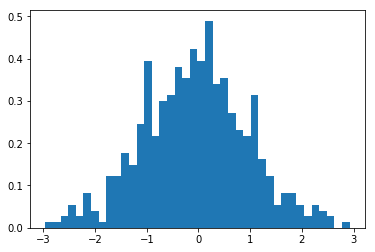

In [11]:
data = np.random.randn(500)    # 500 draws from the standard normal distribution
h = plt.hist(data, bins=40, density = True)

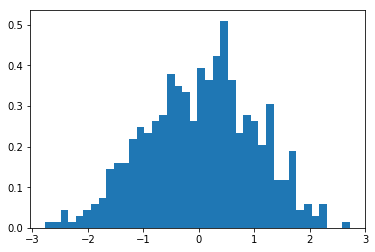

In [12]:
data = np.random.randn(500)
h = plt.hist(data, bins=40, density =True)

# Exercises

Download this file: http://johnstachurski.net/lectures/_downloads/table.csv to your notebook folder.

It contains daily quotes for the Nikkei 225 from Jan 1984 until May 2009, downloaded from Yahoo finance.


Here are the first few lines

    Date,Open,High,Low,Close,Volume,Adj Close
    2009-05-21,9280.35,9286.35,9189.92,9264.15,133200,9264.15
    2009-05-20,9372.72,9399.40,9311.61,9344.64,143200,9344.64
    2009-05-19,9172.56,9326.75,9166.97,9290.29,167000,9290.29
    2009-05-18,9167.05,9167.82,8997.74,9038.69,147800,9038.69
    2009-05-15,9150.21,9272.08,9140.90,9265.02,172000,9265.02

Data is comma separated (csv), with most recent date first

For our price data we will use the last column (Adj Close)

## Exercise 1:

Plot the data (i.e., the Adj Close column) as a time series

Use the csv reader to extract the data.
You might like to use the following function:

    to_date = lambda d: datetime.strptime(d,"%Y-%m-%d")


Make sure your time series is from earliest (i.e., Jan 84) to latest (i.e., May 2009)

In [13]:
import pandas as pd

In [15]:
table = pd.read_csv('data/table.csv', parse_dates=['Date']).set_index('Date')

In [16]:
#!head -4 'completed/data/table.csv' ### Stesso comando per accedere alla prima parte del file 
table.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2009-05-21,9280.35,9286.35,9189.92,9264.15,133200,9264.15
2009-05-20,9372.72,9399.40,9311.61,9344.64,143200,9344.64
2009-05-19,9172.56,9326.75,9166.97,9290.29,167000,9290.29
2009-05-18,9167.05,9167.82,8997.74,9038.69,147800,9038.69
2009-05-15,9150.21,9272.08,9140.90,9265.02,172000,9265.02


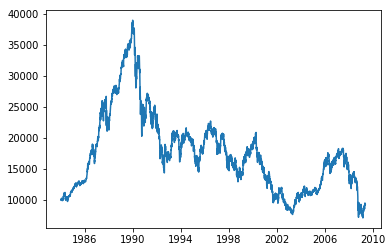

In [17]:
plot(table['Adj Close'])


## Exercise 2:

Write a function that

takes a start year and an end year, and plots daily returns (as a percentage)

Daily return = [(today - yesterday) / yesterday] * 100

In [18]:
def daily_return(data):
    return (data[1:] - data[:-1])/data[:-1] * 100

Text(0.5,1,'Tokio stock exchange')

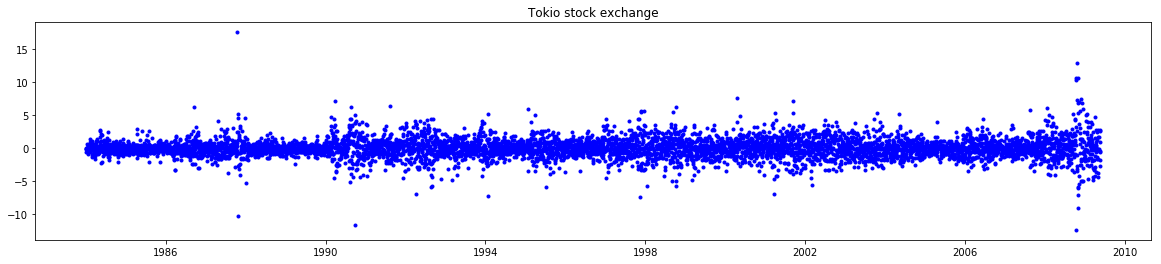

In [19]:
figure(figsize=(20,4))
plt.plot(table.index[1:], daily_return(table['Adj Close'].values), 'b.')
plt.title('Tokio stock exchange')